# Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
sbn.set_style("whitegrid");
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataset

hbm = pd.read_csv('haberman.csv')

# Haberman's Survival Data Set
### Survival of patients who had undergone surgery for breast cancer
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### What I got to know about the features in dataset
<ul>
  <li>Age of patient at time of operation (numerical)</li>
  <li>Patient's year of operation (year - 1900, numerical)</li>
  <li>Number of positive axillary nodes detected. The lymphatic system is one of the body's primary tools for fighting infection. This system contains lymph fluid and lymph nodes, which occur in critical areas in the body. Cancer cells sometimes enter and build up in the lymph system. ... When these filter points are in the armpit, doctors call them axillary lymph nodes.
   </li>
  <li>Survival status where 1 is the patient survived 5 years or longer and 2 means the patient died within 5 year.</li>
</ul>

![Node](https://www.clevelandclinic.org/healthinfo/ShowImage.ashx?PIC=4421)

### Here Survival status is our class which we need to predict for new data point.

### Objective:
Given <ul>
  <li>Age</li>
  <li>Year of operation</li>
  <li>No of axillary nodes</li>
</ul> 

### predict that
patient survived 5 years or longer
<b>or</b>
the patient died within 5 year.


# Note: In observations survived means survived for >=5 years and not survived means not survived atleast 5 years

# 1. High level statistics of the dataset:

In [3]:
# number of data points
print(hbm.shape)

# check number of classes in datasets
classes = hbm.status.unique()
print(classes)
# here  1 = the patient survived 5 years or
#       2 = the patient died within 5 year

# column names
print(hbm.columns)

hbm.describe() # this will show count of each col, mean, standard deviation, min, max, quantiles

(306, 4)
[1 2]
Index(['age', 'year', 'nodes', 'status'], dtype='object')


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
# data points per class 
hbm.status.value_counts()

# here you can see data point count of class 1 is 225 and data point count for class 2 is 81 
# it's not a well balanced dataset.

1    225
2     81
Name: status, dtype: int64

## Conclusion after High level statistics of the dataset
<ul>
  <li>Number of Data points is: 306 </li>
  <li>Number of features is 3</li>
  <li>Featuers are age,	year and nodes</li>
  <li>Number of classes is 2 ( say 1 and 2) where
  <ol>
    <li>is the patient survived 5 years or more</li>
    <li>is the patient died within 5 year</li>
  </ol></li>
  <li>Data-points per class are 
  <ol>
    <li>class = 225</li>
    <li>class = 81</li>
  </ol></li>
   <li>Data set is not balanced</li>
    <li>There is no nan values in dataset</li>
</ul>

# 2. Explain our objective.


### Given a new data point of feature values:<ul>
  <li>Age</li>
  <li>Year of operation</li>
  <li>No of axillary nodes</li>
</ul> 

### predict that-
If patient survived 5 years or longer
<b>or</b>
the patient died within 5 year.

# 3. Univariate analysis

In [5]:
import numpy as np
survived  = hbm.loc[hbm["status"] == 1];

not_survived = hbm.loc[hbm["status"] == 2];
del survived["status"]
del not_survived['status']


If I use 1D plot I can't get usefull information of classification

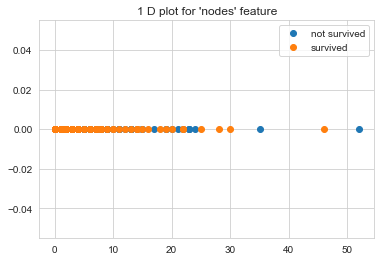

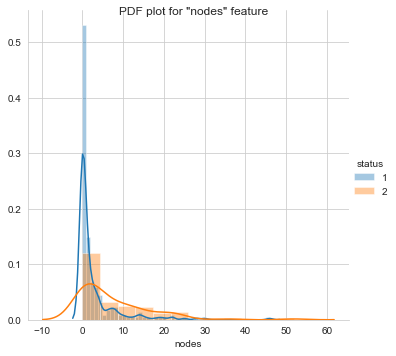

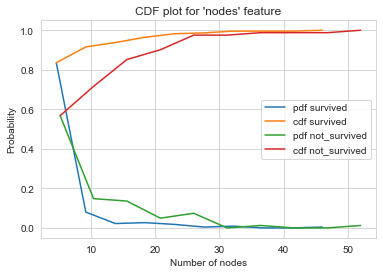

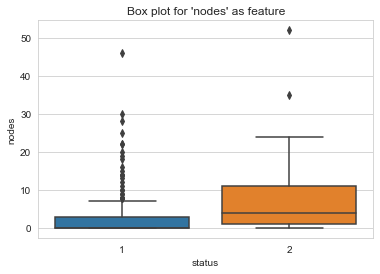

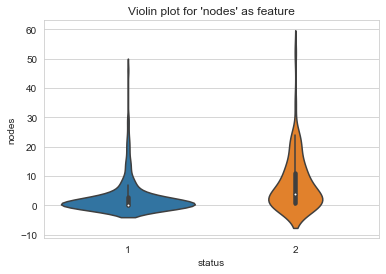

****************************** Nodes ******************************
Means:
survived 2.7911111111111113
not_survived 7.45679012345679
Std
survived 5.857258449412131
not_survived 9.128776076761632
Medians:
survived 0.0
not_survived 4.0
Quantiles:
survived [0. 0. 0. 3.]
not_survived [ 0.  1.  4. 11.]
90th Percentiles:
survived 8.0
not_survived 20.0
Median Absolute Deviation
survived 0.0
not_survived 5.930408874022408


In [6]:
# classification using 'nodes' as feature

# 1 D 
plt.plot(not_survived.nodes, np.zeros_like(not_survived.nodes), 'o',label='not survived')
plt.plot(survived.nodes, np.zeros_like(survived.nodes), 'o',label='survived')
plt.legend()
plt.title("1 D plot for 'nodes' feature")
plt.show()

# Freq distribution of same graph
sbn.FacetGrid(hbm, hue="status", size=5) \
   .map(sbn.distplot, "nodes") \
   .add_legend().fig.suptitle('PDF plot for "nodes" feature');
plt.show();

# Let's plot CDF of nodes for both status

counts, bin_edges = np.histogram(survived.nodes, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf survived")
plt.plot(bin_edges[1:], cdf,label="cdf survived")
plt.title("CDF plot for 'nodes' feature")


counts, bin_edges = np.histogram(not_survived.nodes, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf not_survived")
plt.plot(bin_edges[1:], cdf,label="cdf not_survived")
plt.xlabel("Number of nodes")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Box plot for this feature
sbn.boxplot(x='status',y='nodes', data=hbm)
plt.title("Box plot for 'nodes' as feature")

plt.show()

# Violin plot for this feature

sbn.violinplot(x="status", y="nodes", data=hbm, size=8)
plt.title("Violin plot for 'nodes' as feature")

plt.show()

print("*"*30,"Nodes","*"*30)
#Mean, Variance, Std-deviation,  
print("Means:")
print("survived", np.mean(survived.nodes))
print("not_survived", np.mean(not_survived.nodes))

print("Std");
print("survived", np.std(survived.nodes))
print("not_survived", np.std(not_survived.nodes))

#Median, Quantiles, Percentiles, IQR.
print("Medians:")
print("survived", np.median(survived.nodes))
print("not_survived", np.median(not_survived.nodes))


print("Quantiles:")
print("survived", np.pesrcentile(survived.nodes,np.arange(0, 100, 25)))
print("not_survived", np.percentile(not_survived.nodes,np.arange(0, 100, 25)))


print("90th Percentiles:")
print("survived", np.percentile(survived.nodes, 90))
print("not_survived", np.percentile(not_survived.nodes, 90))



from statsmodels import robust
print ("Median Absolute Deviation")
print("survived", robust.mad(survived.nodes))
print("not_survived", robust.mad(not_survived.nodes))


### Observations
<ul>
  <li>I can say that mean of #nodes of patients who survived are less and for patients who did not survive it is high. </li>
  <li>Using box plot we can say there are 75% chances of survival if number of nodes are less than or equal to 2.</li>
  <li>There are outliers in nodes and can be seen by 1D graph, and also by the difference between mean and median. </li>
  <li>50% Chances are there that case with number of nodes greater than 2 not survived </li>
  <li>Roughly I can write a rule like <br>if: #nodes <=0: sure he'll survive <br>if: #nodes <=3: chances that he'll  survive <br> else: less chances of survival </li>
  <li>from CDF I can say there is a 85% chance of survival if #nodes  are <5. </li>
  
  <li>also from CDF 100% of people have less chances of survival if nodes increases > 40. </li>
  <li>From 90th Percentile we can say there are 90% chances of survival of if #nodes are < 8. </li>
  <li>From 90th Percentile we can say there are 90% chances of not surviving if #nodes are >20. </li>
  <li>From box plot I can say survival threshold (25%tile to 75%tile lie) is 0 to 7.</li>
  
</ul>

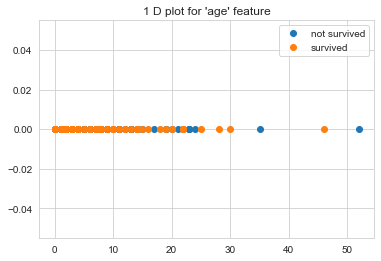

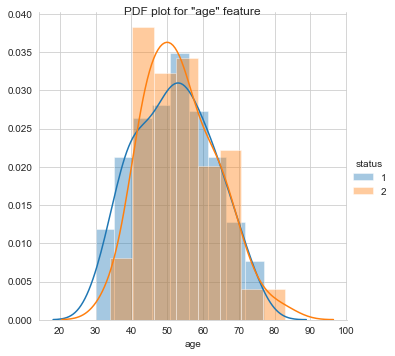

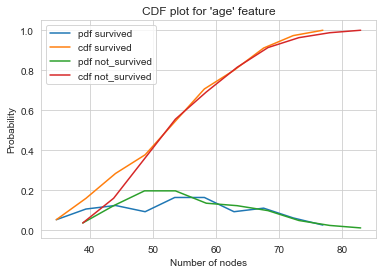

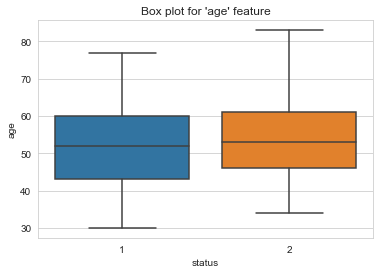

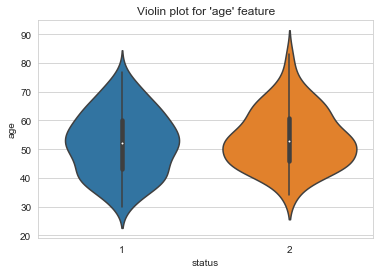

****************************** Age ******************************
Means:
survived 52.01777777777778
not_survived 53.67901234567901
Std
survived 10.98765547510051
not_survived 10.10418219303131
Medians:
survived 52.0
not_survived 53.0
Quantiles:
survived [30. 43. 52. 60.]
not_survived [34. 46. 53. 61.]
90th Percentiles:
survived 67.0
not_survived 67.0
Median Absolute Deviation
survived 13.343419966550417
not_survived 11.860817748044816


In [7]:
# classification using 'age' as feature

# 1 D 
plt.plot(not_survived.nodes, np.zeros_like(not_survived.age), 'o',label='not survived')
plt.plot(survived.nodes, np.zeros_like(survived.age), 'o',label='survived')
plt.legend()
plt.title("1 D plot for 'age' feature")
plt.show()

# Freq distribution of same graph
sbn.FacetGrid(hbm, hue="status", size=5) \
   .map(sbn.distplot, "age") \
   .add_legend().fig.suptitle('PDF plot for "age" feature');
plt.show();

# Let's plot CDF of age for both status


counts, bin_edges = np.histogram(survived.age, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf survived")
plt.plot(bin_edges[1:], cdf,label="cdf survived")
plt.title("CDF plot for 'age' feature")



counts, bin_edges = np.histogram(not_survived.age, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf not_survived")
plt.plot(bin_edges[1:], cdf,label="cdf not_survived")
plt.xlabel("Number of nodes")
plt.ylabel("Probability")
plt.legend()
plt.show()


# Box plot for this feature
sbn.boxplot(x='status',y='age', data=hbm)
plt.title("Box plot for 'age' feature")

plt.show()

# Violin plot for this feature

sbn.violinplot(x="status", y="age", data=hbm, size=8)
plt.title("Violin plot for 'age' feature")

plt.show()

print("*"*30,"Age","*"*30)
#Mean, Variance, Std-deviation,  
print("Means:")
print("survived", np.mean(survived.age))
print("not_survived", np.mean(not_survived.age))

print("Std");
print("survived", np.std(survived.age))
print("not_survived", np.std(not_survived.age))

#Median, Quantiles, Percentiles, IQR.
print("Medians:")
print("survived", np.median(survived.age))
print("not_survived", np.median(not_survived.age))


print("Quantiles:")
print("survived", np.percentile(survived.age,np.arange(0, 100, 25)))
print("not_survived", np.percentile(not_survived.age,np.arange(0, 100, 25)))


print("90th Percentiles:")
print("survived", np.percentile(survived.age, 90))
print("not_survived", np.percentile(not_survived.age, 90))



from statsmodels import robust
print ("Median Absolute Deviation")
print("survived", robust.mad(survived.age))
print("not_survived", robust.mad(not_survived.age))

### Observations
<ul>
  <li>Age does not affect survival chances very much.</li>
  <li>I can say chance of survival is less if age is between 42 to 57.</li>
  <li>Chances of survival is more if age is less than 40.</li>
  <li>After age of 60 age have negligible effect on chances of survival.</li>
</ul>

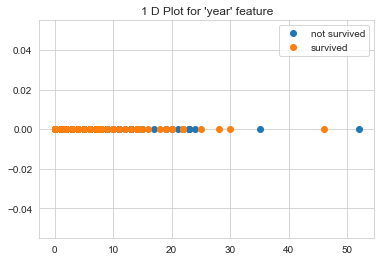

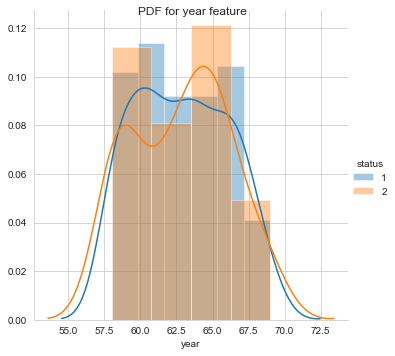

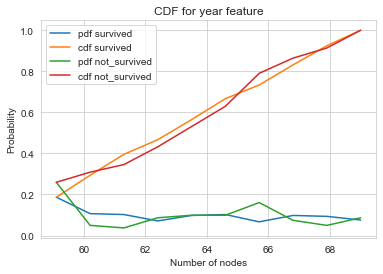

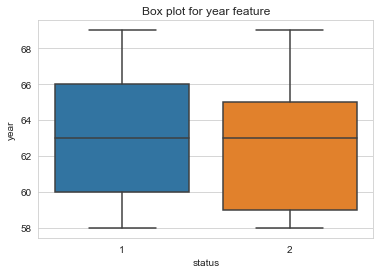

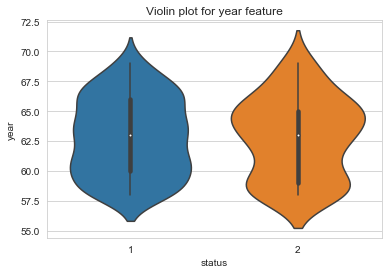

****************************** Year ******************************
Means:
survived 62.86222222222222
not_survived 62.82716049382716
Std
survived 3.2157452144021956
not_survived 3.3214236255207883
Medians:
survived 63.0
not_survived 63.0
Quantiles:
survived [58. 60. 63. 66.]
not_survived [58. 59. 63. 65.]
90th Percentiles:
survived 67.0
not_survived 67.0
Median Absolute Deviation
survived 4.447806655516806
not_survived 4.447806655516806


In [8]:
# classification using 'year' as feature

# 1 D 

plt.plot(not_survived.nodes, np.zeros_like(not_survived.year), 'o',label='not survived')
plt.plot(survived.nodes, np.zeros_like(survived.year), 'o',label='survived')
plt.title("1 D Plot for 'year' feature")
plt.legend()
plt.show()

# PDF of same graph
sbn.FacetGrid(hbm, hue="status", size=5) \
   .map(sbn.distplot, "year") \
   .add_legend().fig.suptitle('PDF for year feature');

plt.show();

# CDF of same data

counts, bin_edges = np.histogram(survived.year, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf survived")
plt.plot(bin_edges[1:], cdf,label="cdf survived")


counts, bin_edges = np.histogram(not_survived.year, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf not_survived")
plt.plot(bin_edges[1:], cdf,label="cdf not_survived")
plt.xlabel("Number of nodes")
plt.ylabel("Probability")
plt.legend()
plt.title("CDF for year feature")
plt.show()

# Box plot for this feature
sbn.boxplot(x='status',y='year', data=hbm)
plt.title("Box plot for year feature")
plt.show()


# Violin plot for this feature

sbn.violinplot(x="status", y="year", data=hbm, size=8)
plt.title("Violin plot for year feature")

plt.show()


print("*"*30,"Year","*"*30)
#Mean, Variance, Std-deviation,  
print("Means:")
print("survived", np.mean(survived.year))
print("not_survived", np.mean(not_survived.year))

print("Std");
print("survived", np.std(survived.year))
print("not_survived", np.std(not_survived.year))

#Median, Quantiles, Percentiles, IQR.
print("Medians:")
print("survived", np.median(survived.year))
print("not_survived", np.median(not_survived.year))


print("Quantiles:")
print("survived", np.percentile(survived.year,np.arange(0, 100, 25)))
print("not_survived", np.percentile(not_survived.year,np.arange(0, 100, 25)))


print("90th Percentiles:")
print("survived", np.percentile(survived.year, 90))
print("not_survived", np.percentile(not_survived.year, 90))



from statsmodels import robust
print ("Median Absolute Deviation")
print("survived", robust.mad(survived.year))
print("not_survived", robust.mad(not_survived.year))

### Observations
<ul>
  <li> Box plots shows that year parameter for both statuses are similar.</li>
  <li>survival rate of operations between 1963 and 1966 is very less.</li>
</ul>

<h1 ><font color="red">Note:</font></h1>

### Till this point I can say age and Year of operation does not affect the decision or predictions.
### Survival rate is Inversely proportional to the number of nodes present, which feels obvious.

### What I can see is year and age is not a good parameter to generae rule for prediction

### Let's have Bivariate Analysis

For Bivariate analysis we have scatter plots and pair plots
### 2D Scatter Plots

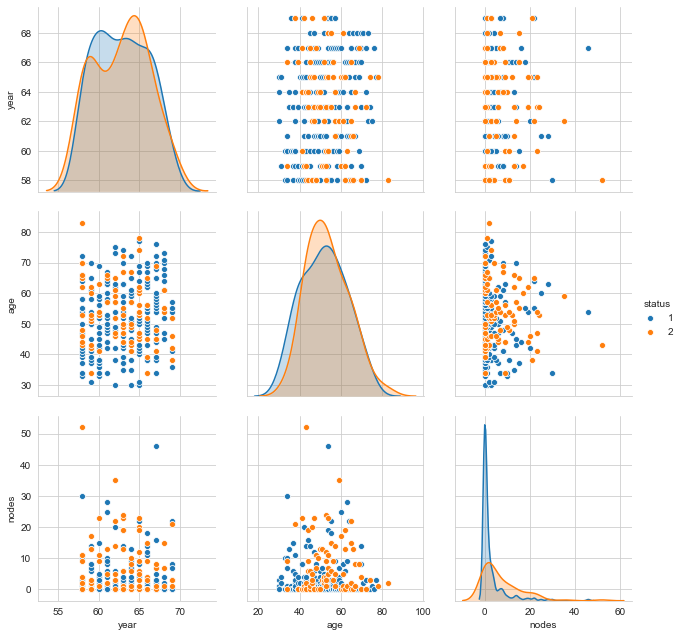

In [9]:
# I didn't intentionally, Problem was:  By default, seaborn will show all numeric columns!
# if you have 'status' column as the numerical values, you have to use 'vars' to specify what columns you are going to use
plt.close();
sbn.set_style("whitegrid");
sbn.pairplot(hbm, hue="status", size=3,vars=['year','age','nodes']);
plt.show()

### From here we can conclude graph between Year and Nodes are better than others.

<h1 ><font color="red">Note:</font></h1>

## Honestly I can't see any major benefit of Bi-variate analysis.

# Multivariate Analysis

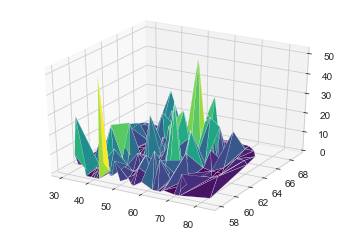

In [12]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(hbm.age, hbm.year, hbm.nodes, cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(hbm.age, hbm.year, hbm.nodes, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(hbm.age, hbm.year, hbm.nodes, cmap=plt.cm.jet, linewidth=0.01)
plt.show()


### Summary
<ul>
  <li>What I can see is Number of Nodes is the best parameter to write a rule for prediction.</li>
  <li>We can also consider the variation and insights that came out of Univariate analysis of Year parameter.</li>
  <li>I find making predictions difficult because data is not balanced.</li>
      <li>I can say that mean of #nodes of patients who survived are less and for patients who did not survive it is high. </li>
  <li>Using box plot we can say there are 75% chances of survival if number of nodes are less than or equal to 2.</li>
  <li>There are outliers in nodes and can be seen by 1D graph, and also by the difference between mean and median. </li>
  <li>50% Chances are there that case with number of nodes greater than 2 not survived </li>
  <li>Roughly I can write a rule like <br>if: #nodes <=0: sure he'll survive <br>if: #nodes <=3: chances that he'll  survive <br> else: less chances of survival </li>
  <li>from CDF I can say there is a 85% chance of survival if #nodes  are <5. </li>
  
  <li>also from CDF 100% of people have less chances of survival if nodes increases > 40. </li>
  <li>From 90th Percentile we can say there are 90% chances of survival of if #nodes are < 8. </li>
  <li>From 90th Percentile we can say there are 90% chances of not surviving if #nodes are >20. </li>
  <li>From box plot I can say survival threshold (25%tile to 75%tile lie) is 0 to 7.</li>
    <li>Age does not affect survival chances very much.</li>
  <li>I can say chance of survival is less if age is between 42 to 57.</li>
  <li>Chances of survival is more if age is less than 40.</li>
  <li>After age of 60 age have negligible effect on chances of survival.</li>
    <li> Box plots shows that year parameter for both statuses are similar.</li>
  <li>survival rate of operations between 1963 and 1966 is very less.</li>
</ul>